In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Data Loading

In [67]:
from sklearn import datasets

data = datasets.fetch_california_housing(as_frame=True)

X = data.data
y = data.target

df = data.frame

print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Shape of dataset: (20640, 9)
Columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 2. Exploratory Data Analysis

In [82]:
import os

os.makedirs('../outputs/eda', exist_ok=True)
os.makedirs('../outputs/models', exist_ok=True)

In [69]:
print("\nSummary Statistics:")
df.describe().T


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [70]:
print("\nMissing values per column:")
df.isnull().sum()


Missing values per column:


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

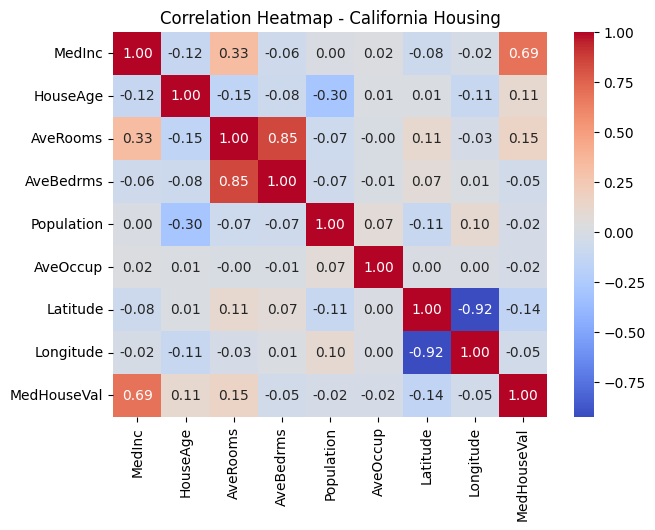

In [71]:
plt.figure(figsize=(7, 5))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='0.2f')
plt.title("Correlation Heatmap - California Housing")
plt.savefig('../outputs/eda/correlation.png')
plt.show()

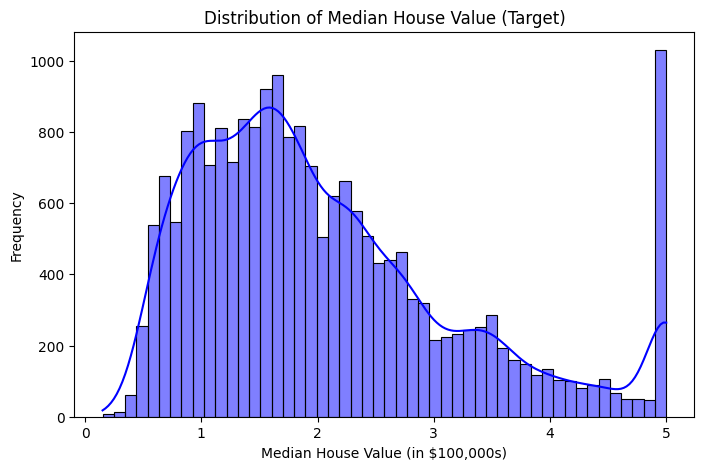

In [72]:
plt.figure(figsize=(8, 5))
sns.histplot(df['MedHouseVal'], bins=50, kde=True, color='blue')
plt.title("Distribution of Median House Value (Target)")
plt.xlabel("Median House Value (in $100,000s)")
plt.ylabel("Frequency")
plt.savefig('../outputs/eda/target_distribution.png')
plt.show()

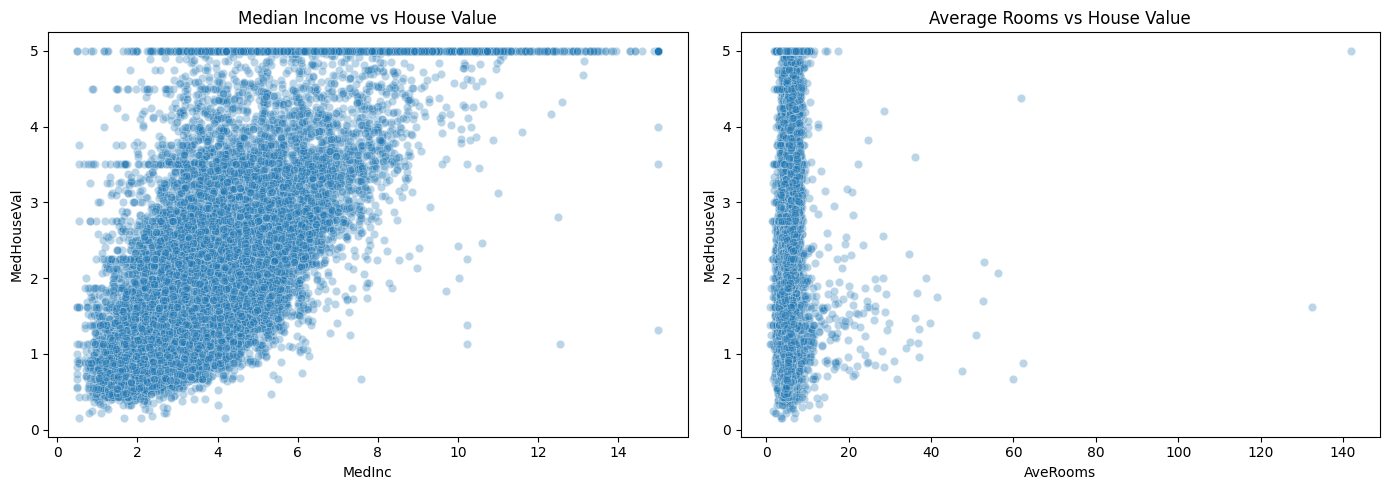

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(x=df["MedInc"], y=df["MedHouseVal"], alpha=0.3, ax=axes[0])
axes[0].set_title("Median Income vs House Value")

sns.scatterplot(x=df["AveRooms"], y=df["MedHouseVal"], alpha=0.3, ax=axes[1])
axes[1].set_title("Average Rooms vs House Value")

plt.savefig('../outputs/eda/feature_vs_target.png')
plt.tight_layout()
plt.show()

## 3. Train-test split 

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Train shape: (16512, 8)
Test shape: (4128, 8)


## 4. Model Building

In [75]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

results = []

knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

## 5. Model Evaluation

In [76]:
y_pred = knn.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Baseline KNN (k=5):")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

results.append({'model':'KNN', 'RMSE':rmse, 'MSE':mae, 'r2':r2})

Baseline KNN (k=5):
RMSE: 1.1487
MAE : 0.8946
R²  : -0.0070


## 6. Hyperparameter Tuning

In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15, 20, 30],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

tuned_model = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=9)
tuned_model.fit(X_train_scaled, y_train)

print("Best Parameters:", tuned_model.best_params_)
best_knn = tuned_model.best_estimator_

Best Parameters: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


In [78]:
y_pred_best = best_knn.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae = mean_absolute_error(y_test, y_pred_best)
r2 = r2_score(y_test, y_pred_best)

print("\nBest KNN Model Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

results.append({'model':'Tuned', 'RMSE':rmse, 'MSE':mae, 'r2':r2})


Best KNN Model Performance:
RMSE: 0.6107
MAE : 0.4161
R²  : 0.7154


In [79]:
results_df = pd.DataFrame(results)
results_df

,model,RMSE,MSE,r2
0,KNN,1.148720,0.894572,-0.006982
1,Tuned,0.610712,0.416066,0.715379


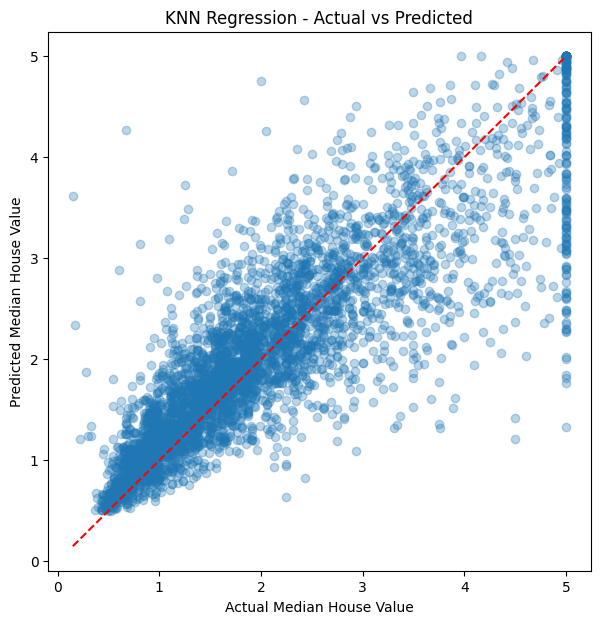

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_best, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("KNN Regression - Actual vs Predicted")
plt.show()

## 7. Save and Load Model

In [81]:
import joblib

joblib.dump(best_knn, '../outputs/models/knn_tuned.pkl')
print("Model Saved Successfully")

model = joblib.load('../outputs/models/knn_tuned.pkl')
y_pred = model.predict(X_test)

Model Saved Successfully
